In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

from data.synthetic import generate_training_test_data

from lib.train import Trainer, synthetic_experiments
from lib.regularization import loss_reg
from lib.models import toy_nn
import lib.plots as plots

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
### generate causal variables: two known concepts and two unknown concepts

## set random seed for reproducibility
np.random.seed(0)

num_samples = 2000
concepts1 = np.random.normal(0, 1, num_samples)
concepts2 = np.random.normal(0, 1, num_samples)

unknown_concepts1 = np.random.normal(0, 1, num_samples)
unknown_concepts2 = np.random.normal(0, 1, num_samples)

x_all = np.vstack((concepts1, concepts2, unknown_concepts1, unknown_concepts2)).T

## generate output based on the concepts and unknown concepts
y_all = 4*concepts1 - 0.5*concepts2 + 1*unknown_concepts1 + 2*unknown_concepts2 + np.random.normal(0, 0.1, num_samples)

#### Synthetic experiments with different shortcut types

1. Only correlated with known concepts
2. Correlated with unknown concepts
3. Highly correlated with the outputs

In [3]:
### set parameters for synthetic experiments

input_size = 5
output_size = 1
basic_loss = nn.MSELoss()
optimizer = optim.Adam
reg_strength = 0.01
optimizer_params = {'lr': 0.01, 'weight_decay': 0}
scheduler_params={'step_size': 500, 'gamma': 0.99}
num_epochs = 200

estiamte_treated_effect = True

classification = False
to_print = True

1. Shortcut variable is only correlated with known concept variables.

In [4]:
### generate shortcut correlated with known concepts
shortcut_with = "c"
classification = False
x_train_c, y_train_c, x_test_c, y_test_c = generate_training_test_data(x_all, y_all, shortcut_with=shortcut_with, classification=classification)

experiment_model_c = synthetic_experiments(input_size, output_size, loss_reg, basic_loss, reg_strength,
                                         classification, to_print, device="cpu", estiamte_treatment_effect=estiamte_treated_effect,
                                         train_data=x_train_c, test_data=x_test_c, train_label=y_train_c, test_label=y_test_c,
                                         optimizer_fn=optimizer,
                                         optimizer_params=optimizer_params,
                                         scheduler_params=scheduler_params,
                                         num_epochs=num_epochs)

/opt/anaconda3/envs/msc_causal/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Epoch 200/200 Train Loss: 0.0105, Test Loss: 15.6425, Val TE: 15.5026: 100%|██████████| 200/200 [00:06<00:00, 31.52epoch/s]


Parameter containing:
tensor([[1.2968, 0.4027, 1.0000, 2.0041, 2.8039]], requires_grad=True)


Epoch 200/200 Train Loss: 0.0101, Test Loss: 0.0101, Val TE: 0.0584: 100%|██████████| 200/200 [00:07<00:00, 27.22epoch/s]


Parameter containing:
tensor([[ 4.0114, -0.5001,  0.9955,  2.0000,  0.0103]], requires_grad=True)


Epoch 200/200 Train Loss: 0.0106, Test Loss: 0.0104, Val TE: 0.0862: 100%|██████████| 200/200 [00:07<00:00, 25.59epoch/s]


Parameter containing:
tensor([[ 4.0126, -0.4978,  0.9901,  1.9868,  0.0138]], requires_grad=True)


Epoch 200/200 Train Loss: 0.0100, Test Loss: 0.0103, Val TE: 0.0973: 100%|██████████| 200/200 [00:09<00:00, 21.99epoch/s]


Parameter containing:
tensor([[ 4.0002, -0.4962,  0.9917,  1.9969,  0.0174]], requires_grad=True)


Epoch 200/200 Train Loss: 0.0110, Test Loss: 0.0116, Val TE: 0.0396: 100%|██████████| 200/200 [00:07<00:00, 27.84epoch/s]

Parameter containing:
tensor([[ 3.9717, -0.4893,  0.9798,  1.9812,  0.0066]], requires_grad=True)


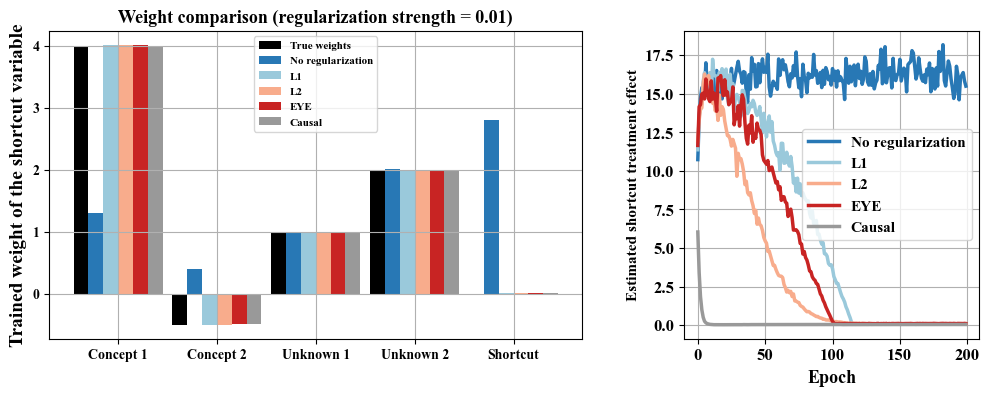

In [5]:
fig = plt.figure(figsize=(12, 4))
grid = plt.GridSpec(1, 12, wspace=0.4, hspace=0.3)

ax1 = plt.subplot(grid[0, 0:7])
fig_weights_synthetic_c = plots.plot_weights_for_synthetic_experiment(experiment_model=experiment_model_c, reg_strength=reg_strength, ax=ax1)
plt.subplot(grid[0, 8:])
fig_te_synthetic_c = plots.plot_treatment_effect(experiment_model=experiment_model_c)

2. Shortcut variable is also correalted with unknown concept variables.

In [6]:
### simple fail case

### generate shortcut correlated with known concepts
shortcut_with = "u"
classification = False
x_train_u, y_train_u, x_test_u, y_test_u = generate_training_test_data(x_all, y_all, shortcut_with=shortcut_with, classification=classification)

experiment_model_u = synthetic_experiments(input_size, output_size, loss_reg, basic_loss, reg_strength,
                                         classification, to_print, device="cpu", estiamte_treatment_effect=estiamte_treated_effect,
                                         train_data=x_train_u, test_data=x_test_u, train_label=y_train_u, test_label=y_test_u,
                                         optimizer_fn=optimizer,
                                         optimizer_params=optimizer_params,
                                         scheduler_params=scheduler_params,
                                         num_epochs=num_epochs)

Epoch 200/200 Train Loss: 0.0104, Test Loss: 4.4859, Val TE: 8.5075: 100%|██████████| 200/200 [00:06<00:00, 32.43epoch/s] 


Parameter containing:
tensor([[ 4.0150, -0.1649,  0.3207,  0.6477,  1.5387]], requires_grad=True)


Epoch 200/200 Train Loss: 0.0109, Test Loss: 9.5943, Val TE: 12.7157: 100%|██████████| 200/200 [00:07<00:00, 26.02epoch/s]


Parameter containing:
tensor([[ 4.0130e+00, -8.0194e-03,  3.7853e-03,  1.6222e-02,  2.2450e+00]],
       requires_grad=True)


Epoch 200/200 Train Loss: 0.0101, Test Loss: 2.3391, Val TE: 6.8917: 100%|██████████| 200/200 [00:07<00:00, 26.33epoch/s]


Parameter containing:
tensor([[ 4.0144, -0.2578,  0.5067,  1.0209,  1.1052]], requires_grad=True)


Epoch 200/200 Train Loss: 0.0108, Test Loss: 9.5928, Val TE: 12.5248: 100%|██████████| 200/200 [00:09<00:00, 21.57epoch/s]


Parameter containing:
tensor([[ 4.0085e+00, -7.6575e-03,  2.1439e-03,  1.5143e-02,  2.2425e+00]],
       requires_grad=True)


Epoch 200/200 Train Loss: 0.0113, Test Loss: 0.0113, Val TE: 0.0063: 100%|██████████| 200/200 [00:06<00:00, 29.54epoch/s]

Parameter containing:
tensor([[ 3.9768e+00, -4.8999e-01,  9.7886e-01,  1.9794e+00, -1.0386e-03]],
       requires_grad=True)


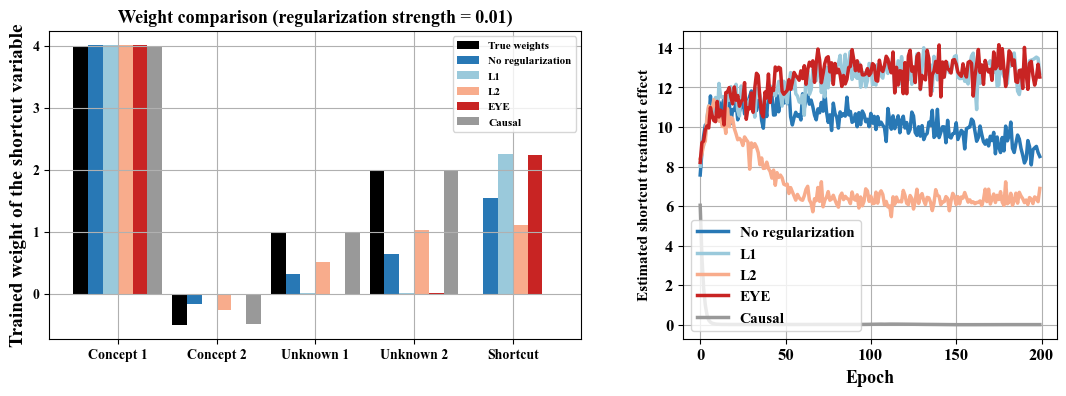

In [7]:
fig = plt.figure(figsize=(13, 4))
grid = plt.GridSpec(1, 13, wspace=0.4, hspace=0.3)

ax1 = plt.subplot(grid[0, 0:7])
fig_weights_synthetic_u = plots.plot_weights_for_synthetic_experiment(experiment_model=experiment_model_u, reg_strength=reg_strength, ax=ax1)
plt.subplot(grid[0, 8:])
fig_te_synthetic_u = plots.plot_treatment_effect(experiment_model=experiment_model_u)


3. Shortcut variable is highly correlated with the outcome variable.

In [8]:
### simple fail case

### generate shortcut correlated with known concepts
shortcut_with = "y"
classification = False
x_train_y, y_train_y, x_test_y, y_test_y = generate_training_test_data(x_all, y_all, shortcut_with=shortcut_with, classification=classification)

experiment_model_y = synthetic_experiments(input_size, output_size, loss_reg, basic_loss, reg_strength,
                                         classification, to_print, device="cpu", estiamte_treatment_effect=estiamte_treated_effect,
                                         train_data=x_train_y, test_data=x_test_y, train_label=y_train_y, test_label=y_test_y,
                                         optimizer_fn=optimizer,
                                         optimizer_params=optimizer_params,
                                         scheduler_params=scheduler_params,
                                         num_epochs=num_epochs)


Epoch 200/200 Train Loss: 0.0057, Test Loss: 7.8980, Val TE: 11.8815: 100%|██████████| 200/200 [00:06<00:00, 32.72epoch/s]


Parameter containing:
tensor([[ 2.2319, -0.2858,  0.5546,  1.1108,  1.9956]], requires_grad=True)


Epoch 200/200 Train Loss: 0.0073, Test Loss: 1.1289, Val TE: 4.3095: 100%|██████████| 200/200 [00:07<00:00, 27.12epoch/s]


Parameter containing:
tensor([[ 3.3414, -0.4193,  0.8269,  1.6624,  0.7570]], requires_grad=True)


Epoch 200/200 Train Loss: 0.0068, Test Loss: 1.8947, Val TE: 4.6636: 100%|██████████| 200/200 [00:07<00:00, 25.19epoch/s]


Parameter containing:
tensor([[ 3.1432, -0.3931,  0.7751,  1.5547,  0.9758]], requires_grad=True)


Epoch 200/200 Train Loss: 0.0059, Test Loss: 5.3148, Val TE: 9.3235: 100%|██████████| 200/200 [00:09<00:00, 22.09epoch/s] 


Parameter containing:
tensor([[ 2.5523, -0.3220,  0.6266,  1.2646,  1.6329]], requires_grad=True)


Epoch 200/200 Train Loss: 0.0112, Test Loss: 0.0117, Val TE: 0.0227: 100%|██████████| 200/200 [00:07<00:00, 27.11epoch/s]

Parameter containing:
tensor([[ 3.9712e+00, -4.8980e-01,  9.7840e-01,  1.9785e+00,  3.9620e-03]],
       requires_grad=True)


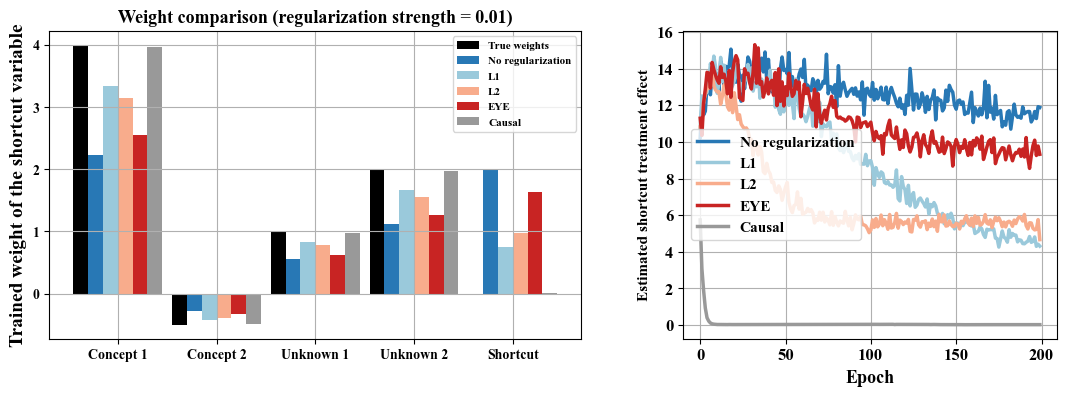

In [9]:
fig = plt.figure(figsize=(13, 4))
grid = plt.GridSpec(1, 13, wspace=0.4, hspace=0.3)

ax1 = plt.subplot(grid[0, 0:7])
fig_weights_synthetic_y = plots.plot_weights_for_synthetic_experiment(experiment_model=experiment_model_y, reg_strength=reg_strength, ax=ax1)
plt.subplot(grid[0, 8:])
fig_te_synthetic_y = plots.plot_treatment_effect(experiment_model=experiment_model_y)

In [10]:
### strength versus weights (the experiments will take a while to run)

input_size = 5
output_size = 1
basic_loss = nn.MSELoss()
optimizer = optim.Adam

optimizer_params = {'lr': 0.01, 'weight_decay': 0}
scheduler_params={'step_size': 100, 'gamma': 0.9}
num_epochs = 200

classification = False
to_print = True

r = torch.tensor([1, 1, 0, 0, 0])
r_causal = torch.tensor([1, 1, 1, 1, 0.0001])

experiment_dict = {"without_reg": {"r": None},
                   "l1": {"r": r},
                   "l2": {"r": r},
                   "eye": {"r": r},
                   "causal": {"r": r_causal}}

x_train, y_train, x_test, y_test = generate_training_test_data(x_all, y_all, shortcut_with="y", classification=classification)

def experiment_regstrength(reg_strength_list):
    experiment_strength = {}
    for reg_strength in reg_strength_list:
        experiment_strength[reg_strength] = {}
        for name, info in experiment_dict.items():
            model = nn.Linear(input_size, output_size, bias=True)
            train_loss_fn = loss_reg(model, basic_loss, reg_name=name, reg_strength=reg_strength, r=info["r"])
            experiment_strength[reg_strength][name] = Trainer(model, device="cpu", 
                                            train_data=x_train, test_data=x_test, train_label=y_train, test_label=y_test,
                                            train_loss_fn=train_loss_fn, test_loss_fn=basic_loss,
                                            optimizer_fn=optimizer,
                                            optimizer_params=optimizer_params,
                                            scheduler_params=scheduler_params,
                                            num_epochs=num_epochs)
            experiment_strength[reg_strength][name].train(classification=classification, to_print=to_print)
    return experiment_strength

reg_strength_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
experiment_strength_all = {}
for idx in range(10):
    experiment_strength_all[idx]=experiment_regstrength(reg_strength_list)

Epoch:   0%|          | 0/200 [00:00<?, ?epoch/s]

Epoch 200/200 Train Loss: 0.0046, Test Loss: 10.6666: 100%|██████████| 200/200 [00:05<00:00, 34.41epoch/s]
Epoch 200/200 Train Loss: 0.0046, Test Loss: 9.4771: 100%|██████████| 200/200 [00:06<00:00, 29.28epoch/s]
Epoch 200/200 Train Loss: 0.0047, Test Loss: 7.3784: 100%|██████████| 200/200 [00:06<00:00, 28.94epoch/s]
Epoch 200/200 Train Loss: 0.0048, Test Loss: 7.1140: 100%|██████████| 200/200 [00:08<00:00, 22.69epoch/s]
Epoch 200/200 Train Loss: 0.0086, Test Loss: 2.3442: 100%|██████████| 200/200 [00:06<00:00, 31.55epoch/s]
Epoch 200/200 Train Loss: 0.0048, Test Loss: 6.5399: 100%|██████████| 200/200 [00:05<00:00, 36.16epoch/s]
Epoch 200/200 Train Loss: 0.0047, Test Loss: 8.4957: 100%|██████████| 200/200 [00:06<00:00, 28.61epoch/s]
Epoch 200/200 Train Loss: 0.0049, Test Loss: 6.2931: 100%|██████████| 200/200 [00:06<00:00, 29.19epoch/s]
Epoch 200/200 Train Loss: 0.0047, Test Loss: 8.0553: 100%|██████████| 200/200 [00:08<00:00, 22.89epoch/s]
Epoch 200/200 Train Loss: 0.0097, Test Loss: 

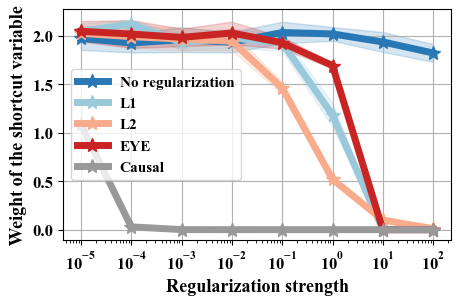

In [11]:
def convert_weight(experiment_strength):
    weights_strength = {}
    test_loss = {}
    for idx , (reg_strength, expeiriment) in enumerate(experiment_strength.items()):
        for name, model in expeiriment.items():
            if idx == 0:
                weights_strength[name] = []
                test_loss[name] = []
            weights_strength[name].append(model.model.weight[0].detach().numpy()[-1])
            test_loss[name].append(model.test_loss[-1].item())
    return weights_strength

labels = {"without_reg": "No regularization", "l1": "L1", "l2":"L2", "eye":"EYE", "causal":"Causal"}
color_dict = {"without_reg": "#2878b5", "l1": "#9ac9db", "l2": "#f8ac8c", "eye": "#c82423", "causal": "#999999"}

weights_strength = {}
for idx, experiment_strength in experiment_strength_all.items():
    weights_strength[idx] = convert_weight(experiment_strength)

### average weights of shortcut variable versus regularization strength
fig, ax = plt.subplots(figsize=(5,3), dpi=100)
for name, label in labels.items():
    shortcut_weight = []
    for idx, value in weights_strength.items():
        shortcut_weight.append(value[name])
    shortcut_weight = np.array(shortcut_weight)
    plt.plot(reg_strength_list, np.mean(shortcut_weight, axis=0), label=labels[name], color=color_dict[name], lw=5, marker="*", markersize=10)
    error = np.std(shortcut_weight, axis=0)*1.96/np.sqrt(10)
    ax.fill_between(reg_strength_list, np.mean(shortcut_weight, axis=0) - error, np.mean(shortcut_weight, axis=0) + error, alpha=0.2, color=color_dict[name])
    
plt.grid(True)
plt.legend(prop = {'family':'times new roman','size':11, 'weight':'bold'})
plt.xticks(fontsize=12, fontfamily='times new roman', fontweight="bold")
plt.yticks(fontsize=12, fontfamily='times new roman', fontweight="bold")
plt.xlabel("Regularization strength", fontsize=13, fontfamily='times new roman', fontweight="bold")
plt.ylabel("Weight of the shortcut variable", fontsize=13, fontfamily='times new roman', fontweight="bold")
plt.xscale("log")

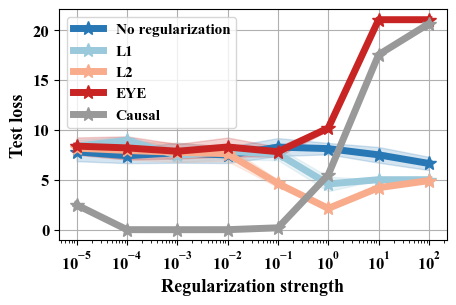

In [12]:
### loss versus regularization strength

def convert_loss(experiment_strength):
    test_loss = {}
    for idx , (reg_strength, expeiriment) in enumerate(experiment_strength.items()):
        for name, model in expeiriment.items():
            if idx == 0:
                test_loss[name] = []
            auc = model.test_loss[-1].item()
            test_loss[name].append(auc)
    return test_loss

labels = {"without_reg": "No regularization", "l1": "L1", "l2":"L2", "eye":"EYE", "causal":"Causal"}
color_dict = {"without_reg": "#2878b5", "l1": "#9ac9db", "l2": "#f8ac8c", "eye": "#c82423", "causal": "#999999"}

reg_strength_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

test_loss = {}
for idx, experiment_strength in experiment_strength_all.items():
    test_loss[idx] = convert_loss(experiment_strength)

fig, ax = plt.subplots(figsize=(5,3), dpi=100)
for name, label in labels.items():
    shortcut_loss = []
    for idx, value in test_loss.items():
        shortcut_loss.append(value[name])
    shortcut_loss = np.array(shortcut_loss)
    plt.plot(reg_strength_list, np.mean(shortcut_loss, axis=0), label=labels[name], color=color_dict[name], lw=5, marker="*", markersize=10)
    mean_value = np.mean(shortcut_loss, axis=0)
    error = np.std(shortcut_loss, axis=0)*1.96/np.sqrt(10)
    ax.fill_between(reg_strength_list, mean_value-error, mean_value+error, alpha=0.2, color=color_dict[name])
    
plt.grid(True)
plt.legend(prop = {'family':'times new roman','size':11, 'weight':'bold'})
plt.xticks(fontsize=12, fontfamily='times new roman', fontweight="bold")
plt.yticks(fontsize=12, fontfamily='times new roman', fontweight="bold")
plt.xlabel("Regularization strength", fontsize=13, fontfamily='times new roman', fontweight="bold")
plt.ylabel("Test loss", fontsize=13, fontfamily='times new roman', fontweight="bold")
plt.xscale("log")

In [13]:
### non-linear case

### generate synthetic data (same as the toy example)
### change the weight and bias to fit the data

np.random.seed(0)

num_samples = 2000
weight = np.array([4, -0.5, 1, 2, 0])
bias = 0

c1 = np.random.normal(0, 1, num_samples).reshape(1, -1).T
c2 = np.random.normal(0, 1, num_samples).reshape(1, -1).T
u1 = np.random.normal(0, 1, num_samples).reshape(1, -1).T
u2 = np.random.normal(0, 1, num_samples).reshape(1, -1).T

### generate s
# s1 = 1.5*c1 - 0.5*c2
s1 = - 0.5*c2 + u1 + 2*u2

### standardize the data
x = np.hstack((c1, c2, u1, u2, s1)).astype(np.float32)
y = (np.dot(x, weight) + bias).astype(np.float32) + np.random.normal(0, 0.1, num_samples).astype(np.float32)

### generate_shortcuts
x[:,-1] = y + np.random.normal(0, 0.1, num_samples).astype(np.float32)
x[:,-1] = (x[:,-1]-np.mean(x[:,-1]))/np.std(x[:,-1]) ### standardize the shortcuts

### generate train and test data
train_x = torch.from_numpy(x[:num_samples//2, :])
train_y = torch.from_numpy(y[:num_samples//2])

test_x = torch.from_numpy(x[num_samples//2:, :])
test_y = torch.from_numpy(y[num_samples//2:])

test_s = np.random.normal(0, 1, num_samples//2)
test_x[:, -1] = torch.tensor(test_s)

input_size = 5
output_size = 1
basic_loss = nn.MSELoss()
optimizer = optim.Adam
reg_strength = 0.001
optimizer_params = {'lr': 0.01, 'weight_decay': 0}
scheduler_params={'step_size': 500, 'gamma': 0.95}
num_epochs = 150

classification = False
to_print = True

r = torch.tensor([1, 1, 0, 0, 0])
r_causal = torch.tensor([1, 1, 1, 1, 0.001])


experiment_dict = {"without_reg": {"r": None},
                   "l1": {"r": r},
                   "l2": {"r": r},
                   "eye": {"r": r},
                   "causal": {"r": r_causal}}


experiment_model = {}
for name, info in experiment_dict.items():
    model = toy_nn(input_size=input_size, output_size=output_size)
    train_loss_fn = loss_reg(model, basic_loss, reg_name=name, reg_strength=reg_strength, r=info["r"])
    experiment_model[name] = Trainer(model, device="cpu", 
                                     train_data=x_train, test_data=x_test, train_label=y_train, test_label=y_test,
                                     train_loss_fn=train_loss_fn, test_loss_fn=basic_loss,
                                     optimizer_fn=optimizer,
                                     optimizer_params=optimizer_params,
                                     scheduler_params=scheduler_params,
                                     num_epochs=num_epochs)
    experiment_model[name].train(classification=classification, to_print=to_print, estimate_treatment_effect=True)

Epoch 150/150 Train Loss: 0.0060, Test Loss: 10.0260, Val TE: 13.2492: 100%|██████████| 150/150 [00:12<00:00, 11.99epoch/s]
Epoch 150/150 Train Loss: 0.0063, Test Loss: 8.2856, Val TE: 11.8678: 100%|██████████| 150/150 [00:12<00:00, 11.67epoch/s]
Epoch 150/150 Train Loss: 0.0068, Test Loss: 7.0663, Val TE: 10.6426: 100%|██████████| 150/150 [00:13<00:00, 11.06epoch/s]
Epoch 150/150 Train Loss: 0.0063, Test Loss: 8.6213, Val TE: 12.1429: 100%|██████████| 150/150 [00:13<00:00, 10.78epoch/s]
Epoch 150/150 Train Loss: 0.0133, Test Loss: 0.0139, Val TE: 0.1565: 100%|██████████| 150/150 [00:12<00:00, 12.07epoch/s]


Text(0, 0.5, 'Estimated shortcut treatment effect')

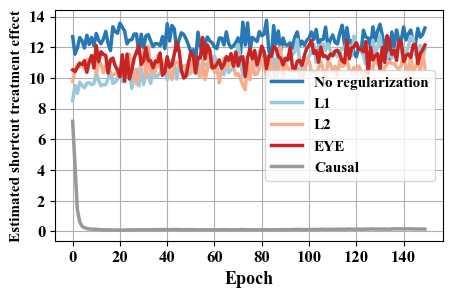

In [14]:
### validation treatment effect
model_dict = {"No regularization": experiment_model["without_reg"], 
              "L1": experiment_model["l1"], 
              "L2": experiment_model["l2"], 
              "EYE": experiment_model["eye"], 
              "Causal": experiment_model["causal"]}
color_dict = {"No regularization": "#2878b5", "L1": "#9ac9db", "L2": "#f8ac8c", "EYE": "#c82423", "Causal":"#999999"}

fig = plt.figure(figsize=(5, 3), dpi=100)
for key, value in model_dict.items():

    val_te = value.test_treatment_effect
    plt.plot(range(0, len(val_te)), val_te, label=key, color=color_dict[key], lw=2.5)

plt.grid(True)
plt.legend(prop = {'family':'times new roman','size':11, 'weight':'bold'})
plt.xticks(fontsize=12, fontfamily='times new roman', fontweight="bold")
plt.yticks(fontsize=12, fontfamily='times new roman', fontweight="bold")
plt.xlabel("Epoch", fontsize=13, fontfamily='times new roman', fontweight="bold")
plt.ylabel("Estimated shortcut treatment effect", fontsize=11, fontweight='bold', font="times new roman")

In [15]:
### correlation with unknown concepts

### generate synthetic data
correlation_withu = 0

def generate_data_correalted_u(correlation_withu):
    classification = False

    ## set random seed for reproducibility
    np.random.seed(0)

    num_samples = 2000
    concepts1 = np.random.normal(0, 1, num_samples)

    unknown_concepts1 = np.random.normal(0, 1, num_samples)

    x_all = np.vstack((concepts1, unknown_concepts1)).T

    ## generate output based on the concepts and unknown concepts
    y_all = 2*concepts1 + 1*unknown_concepts1

    shortcuts = (2*concepts1 + correlation_withu*unknown_concepts1).reshape(-1, 1)

    x_train = x_all[:num_samples//2, :]
    y_train = y_all[:num_samples//2]
    x_test = x_all[num_samples//2:, :]
    y_test = y_all[num_samples//2:]

    np.random.seed(0)
    x_train = np.hstack((x_train, shortcuts[:num_samples//2]))
    x_test = np.hstack((x_test, np.random.normal(0, 1, num_samples//2).reshape(-1, 1)))

    x_train = torch.tensor(x_train, dtype=torch.float)
    y_train = torch.tensor(y_train, dtype=torch.float)
    x_test = torch.tensor(x_test, dtype=torch.float)
    y_test = torch.tensor(y_test, dtype=torch.float)

    return x_train, y_train, x_test, y_test


In [16]:
def train_correlatedu(x_train, y_train, x_test, y_test):
    input_size = 3
    output_size = 1
    basic_loss = nn.MSELoss()
    optimizer = optim.Adam
    reg_strength = 0.001
    optimizer_params = {'lr': 0.01, 'weight_decay': 0}
    scheduler_params={'step_size': 500, 'gamma': 0.99}
    num_epochs = 250

    classification = False
    to_print = True

    r = torch.tensor([1, 0, 0])
    r_causal = torch.tensor([1, 1, 0.001])

    # r = torch.tensor([1, 0, 0])
    # r_causal = torch.tensor([1, 1, 0.001])

    experiment_dict = {"without_reg": {"r": None},
                    "l1": {"r": r},
                    "l2": {"r": r},
                    "eye": {"r": r},
                    "causal": {"r": r_causal}}

    experiment_model = {}
    for name, info in experiment_dict.items():
        model = nn.Linear(input_size, output_size, bias=False)
        torch.manual_seed(0)
        model.weight.data.uniform_(1, 3)
        train_loss_fn = loss_reg(model, basic_loss, reg_name=name, reg_strength=reg_strength, r=info["r"])
        experiment_model[name] = Trainer(model, device="cpu", 
                                        train_data=x_train, test_data=x_test, train_label=y_train, test_label=y_test,
                                        train_loss_fn=train_loss_fn, test_loss_fn=basic_loss,
                                        optimizer_fn=optimizer,
                                        optimizer_params=optimizer_params,
                                        scheduler_params=scheduler_params,
                                        num_epochs=num_epochs)
        experiment_model[name].train(classification=classification, to_print=to_print)
        for param in experiment_model[name].model.parameters():
            print(param)

    return experiment_model

In [17]:
from scipy.stats import pearsonr

corr_u_list = [0, 0.2, 0.4, 0.6, 0.8, 1]
corr_dict = {}
for corr_u in corr_u_list:
    x_train, y_train, x_test, y_test = generate_data_correalted_u(corr_u)
    correlation = pearsonr(x_train[:, -1], x_train[:, 1])
    corr_dict[correlation] = train_correlatedu(x_train, y_train, x_test, y_test)

Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.7559: 100%|██████████| 250/250 [00:07<00:00, 35.20epoch/s]


Parameter containing:
tensor([[1.2104, 1.0001, 0.3949]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0000: 100%|██████████| 250/250 [00:08<00:00, 27.78epoch/s]


Parameter containing:
tensor([[ 1.9986e+00,  9.9948e-01, -2.0991e-04]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0001: 100%|██████████| 250/250 [00:08<00:00, 28.50epoch/s]


Parameter containing:
tensor([[1.9930, 0.9999, 0.0022]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.1972: 100%|██████████| 250/250 [00:12<00:00, 20.55epoch/s]


Parameter containing:
tensor([[1.5961, 1.0000, 0.2004]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0001: 100%|██████████| 250/250 [00:07<00:00, 33.22epoch/s]


Parameter containing:
tensor([[1.9888, 0.9974, 0.0033]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.6589: 100%|██████████| 250/250 [00:06<00:00, 36.53epoch/s]


Parameter containing:
tensor([[1.2665, 0.9274, 0.3665]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0000: 100%|██████████| 250/250 [00:08<00:00, 29.59epoch/s]


Parameter containing:
tensor([[ 1.9994e+00,  9.9921e-01, -1.3953e-04]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.1835: 100%|██████████| 250/250 [00:07<00:00, 31.40epoch/s]


Parameter containing:
tensor([[1.6127, 0.9605, 0.1928]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.7066: 100%|██████████| 250/250 [00:10<00:00, 24.67epoch/s]


Parameter containing:
tensor([[1.2400, 0.9236, 0.3787]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0002: 100%|██████████| 250/250 [00:07<00:00, 32.17epoch/s]


Parameter containing:
tensor([[1.9882, 0.9968, 0.0034]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.5503: 100%|██████████| 250/250 [00:06<00:00, 36.87epoch/s]


Parameter containing:
tensor([[1.3380, 0.8681, 0.3294]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0000: 100%|██████████| 250/250 [00:08<00:00, 30.12epoch/s]


Parameter containing:
tensor([[ 1.9983e+00,  9.9848e-01, -1.4942e-04]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.5978: 100%|██████████| 250/250 [00:09<00:00, 27.59epoch/s]


Parameter containing:
tensor([[1.3109, 0.8608, 0.3442]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 1.5746: 100%|██████████| 250/250 [00:10<00:00, 24.54epoch/s]


Parameter containing:
tensor([[0.8814, 0.7751, 0.5586]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0002: 100%|██████████| 250/250 [00:07<00:00, 34.43epoch/s]


Parameter containing:
tensor([[1.9877, 0.9962, 0.0035]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.4373: 100%|██████████| 250/250 [00:06<00:00, 36.52epoch/s]


Parameter containing:
tensor([[1.4228, 0.8268, 0.2886]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0000: 100%|██████████| 250/250 [00:08<00:00, 29.65epoch/s]


Parameter containing:
tensor([[1.9985e+00, 9.9828e-01, 5.9554e-04]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 1.0190: 100%|██████████| 250/250 [00:08<00:00, 30.75epoch/s]


Parameter containing:
tensor([[1.1194, 0.7341, 0.4405]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 2.7988: 100%|██████████| 250/250 [00:10<00:00, 23.56epoch/s]


Parameter containing:
tensor([[0.5403, 0.5605, 0.7300]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0002: 100%|██████████| 250/250 [00:07<00:00, 33.62epoch/s]


Parameter containing:
tensor([[1.9873, 0.9956, 0.0037]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.3319: 100%|██████████| 250/250 [00:06<00:00, 39.46epoch/s]


Parameter containing:
tensor([[1.5109, 0.8043, 0.2445]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0000: 100%|██████████| 250/250 [00:07<00:00, 31.42epoch/s]


Parameter containing:
tensor([[1.9982e+00, 9.9820e-01, 1.1081e-03]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 1.3178: 100%|██████████| 250/250 [00:07<00:00, 31.69epoch/s]


Parameter containing:
tensor([[1.0258, 0.6092, 0.4873]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 4.3008: 100%|██████████| 250/250 [00:10<00:00, 24.82epoch/s]


Parameter containing:
tensor([[0.2402, 0.2941, 0.8805]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0002: 100%|██████████| 250/250 [00:07<00:00, 33.60epoch/s]


Parameter containing:
tensor([[1.9868, 0.9950, 0.0040]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.2396: 100%|██████████| 250/250 [00:06<00:00, 39.04epoch/s]


Parameter containing:
tensor([[1.5980, 0.7990, 0.2010]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.2395: 100%|██████████| 250/250 [00:08<00:00, 28.60epoch/s]


Parameter containing:
tensor([[1.5981, 0.7996, 0.2014]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 1.4800: 100%|██████████| 250/250 [00:07<00:00, 31.43epoch/s]


Parameter containing:
tensor([[1.0009, 0.5009, 0.4999]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 5.8909: 100%|██████████| 250/250 [00:10<00:00, 23.27epoch/s]


Parameter containing:
tensor([[0.0070, 0.0033, 0.9967]], requires_grad=True)


Epoch 250/250 Train Loss: 0.0000, Test Loss: 0.0002: 100%|██████████| 250/250 [00:07<00:00, 33.52epoch/s]

Parameter containing:
tensor([[1.9863, 0.9942, 0.0042]], requires_grad=True)


In [18]:
for key, value in corr_dict.items():
    print()
    print(round(key.statistic, 4), end=" (training dataset) |")
    for model in ["without_reg", "l1", "l2", "eye", "causal"]:
        train_loss = value[model].train_loss[-1].detach().item()
        print(round(train_loss, 5), end="|")
for key, value in corr_dict.items():
    print()
    print(round(key.statistic, 4), end=" (test dataset) |")
    for model in ["without_reg", "l1", "l2", "eye", "causal"]:
        test_loss = value[model].test_loss[-1].detach().item()
        print(round(test_loss, 4), end="|")


-0.0377 (training dataset) |0.0|0.0|1e-05|1e-05|3e-05|
0.0589 (training dataset) |0.0|0.0|0.0|1e-05|3e-05|
0.1539 (training dataset) |1e-05|1e-05|0.0|0.0|3e-05|
0.2448 (training dataset) |0.0|0.0|0.0|0.0|3e-05|
0.3297 (training dataset) |0.0|0.0|0.0|0.0|3e-05|
0.4073 (training dataset) |0.0|0.0|0.0|0.0|3e-05|
-0.0377 (test dataset) |0.7559|0.0|0.0001|0.1972|0.0001|
0.0589 (test dataset) |0.6589|0.0|0.1835|0.7066|0.0002|
0.1539 (test dataset) |0.5503|0.0|0.5978|1.5746|0.0002|
0.2448 (test dataset) |0.4373|0.0|1.019|2.7988|0.0002|
0.3297 (test dataset) |0.3319|0.0|1.3178|4.3008|0.0002|
0.4073 (test dataset) |0.2396|0.2395|1.48|5.8909|0.0002|